In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ARDRegression, BayesianRidge, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
cars = pd.read_csv('./datasets/car data.csv')
cars = cars.drop(['Car_Name'], axis=1)
columns = ['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Selling_Price']
cars = cars[columns]
cars = cars.replace({
    'Manual': 0,
    'Automatic': 1,
    'Petrol': 0,
    'Diesel': 1,
    'CNG': 2,
    'Individual': 1,
    'Dealer': 0,
})
cars

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5.59,27000,0,0,0,0,3.35
1,2013,9.54,43000,1,0,0,0,4.75
2,2017,9.85,6900,0,0,0,0,7.25
3,2011,4.15,5200,0,0,0,0,2.85
4,2014,6.87,42450,1,0,0,0,4.60
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0,9.50
297,2015,5.90,60000,0,0,0,0,4.00
298,2009,11.00,87934,0,0,0,0,3.35
299,2017,12.50,9000,1,0,0,0,11.50


<AxesSubplot:>

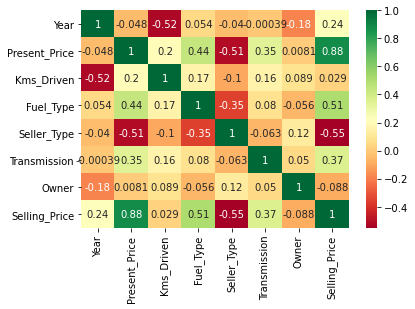

In [6]:
sns.heatmap(cars.corr(), annot=True, cmap='RdYlGn')

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

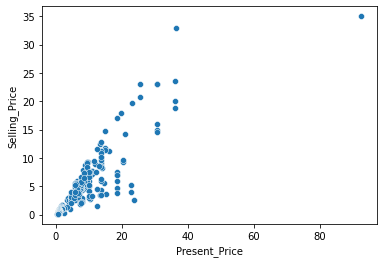

In [7]:
sns.scatterplot(x=cars.Present_Price, y=cars.Selling_Price)

In [68]:
train_set, test_set = train_test_split(cars, test_size=.3)

In [69]:
x_train, y_train = train_set.iloc[:, :-1], train_set.Selling_Price
x_test, y_test = test_set.iloc[:, :-1], test_set.Selling_Price

In [77]:
# model = LinearRegression()
model = DecisionTreeRegressor()

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

pipe.fit(x_train, y_train)
cross_val_score(pipe, x_test, y_test, cv=5, scoring='r2').mean()

0.7230957414028047

<AxesSubplot:ylabel='Selling_Price'>

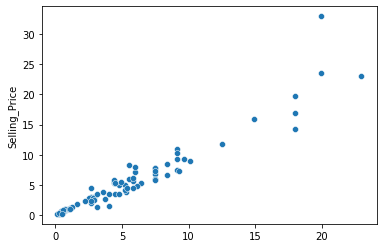

In [75]:
sns.scatterplot(x=pipe.predict(x_test), y=y_test)